<a href="https://colab.research.google.com/github/snig-17/BASC0080/blob/main/MonteCarlo_Engineering_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Engineering Finance:** Portfolio Risk Management

---

In [1]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 46.7 MB/s eta 0:00:00
  Attempting uninstall: curl_cffi
    Found existing installation: curl_cffi 0.14.0
    Uninstalling curl_cffi-0.14.0:
      Successfully uninstalled curl_cffi-0.14.0
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.66
    Uninstalling yfinance-0.2.66:
      Successfully uninstalled yfinance-0.2.66


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin
print(yfin.__version__)

1.0


In [3]:
def get_data(stocks, start, end):
    stockData = yfin.download(stocks, start=start, end=end)['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [4]:
stockList = ['BNS.TO', 'GOOGL', 'XOM', 'NIO', 'KO', 'PEP','ARCC','IBM','AGNC','LCID']
stocks = [stock for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

In [5]:
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

[*********************100%***********************]  10 of 10 completed
/tmp/ipython-input-3960517041.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stockData.pct_change()


In [6]:
weights = np.random.random(len(meanReturns))
# np. random. random() function generates random numbers in interval [0.0, 1.0)
weights /= np.sum(weights)

# %% Monte Carlo simulation
mc_sims = 100 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
#meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 47000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))  # (100, 10) #uncorrelated RV's  #here we know exactly how to sample from this one so no need of acceptance/rejection
    L = np.linalg.cholesky(covMatrix)  # (10, 10) #Cholesky decomposition to Lower Triangular Matrix
    correlated_returns = Z @ L.T  # (100, 10)
    dailyReturns = meanM + correlated_returns  # (100, 10) #Correlated daily returns for individual stocks
    portfolio_returns = dailyReturns @ weights  # Shape (100,)
    portfolio_sims[:, m] = np.cumprod(portfolio_returns + 1) * initialPortfolio

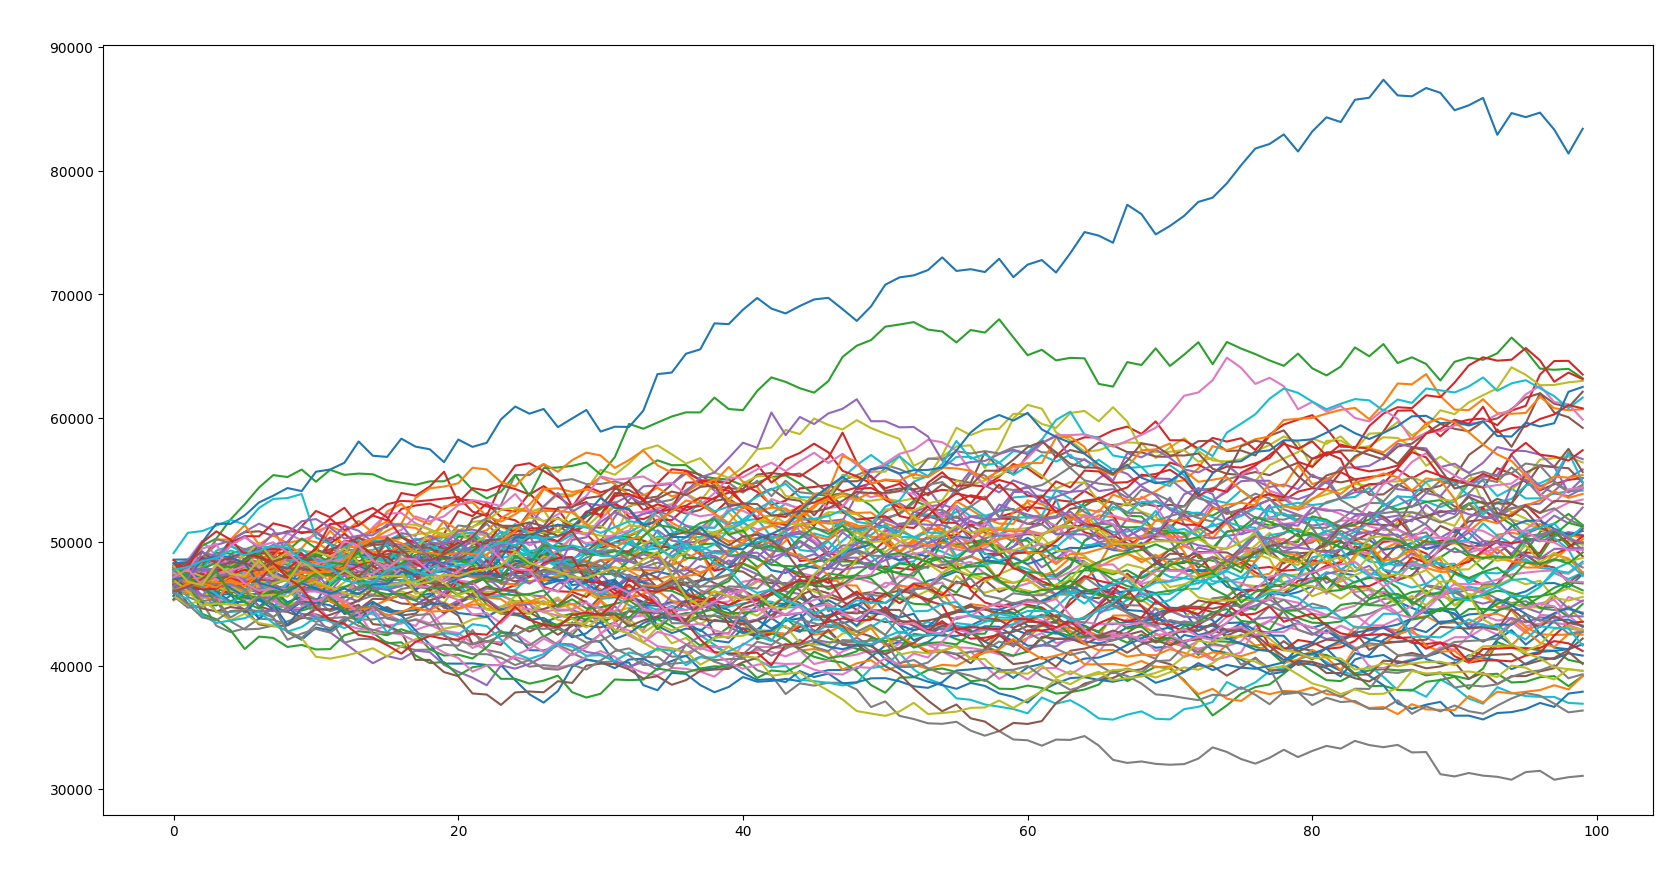

In [7]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 25,
        }
plt.figure(figsize=(20, 10))
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)',  fontdict=font)
plt.xlabel('Days',  fontdict=font)
plt.title('Monte carlo simulation of a stock portfolio',  fontdict=font)
plt.show()

